##### Python [conda env:DataScience]
<hr style="color:#FFA500; width:100%">

<div style="padding:10px; padding-left:15px; color:white; margin:0px; text-align:center; display:fill; border-radius:5px; background-color:#0000cd; overflow:hidden;">
    <h1 style="font-weight:bold;">
        Desarrollo del Modelo: Automovile v.11
    </h1>
</div>

<h2 style="color:#ffa500;">UCI Machine Learning Repository: <a href="https://archive.ics.uci.edu/dataset/10/automobile">Automovile</a></h2>

- #### Dataset con los datos para esta instancia:
    - Carpeta de datos: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
    - Descripción del conjunto de datos: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names 

Fuentes:

1) Especificaciones de automóviles y camiones importados de 1985, Anuario automotriz de Ward de 1985.
2) Manuales personales de automóviles, Oficina de servicios de seguros, 160 Water Street, Nueva York, NY 10038
3) Informe de colisión de seguros, Instituto de seguros para la seguridad en las carreteras, Watergate 600, Washington, DC 20037

Información del conjunto de datos:

Este conjunto de datos consta de tres tipos de entidades: (a) la especificación de un automóvil en términos de diversas características, (b) su calificación de riesgo de seguro asignada, (c) sus pérdidas normalizadas en uso en comparación con otros automóviles. La segunda calificación corresponde al grado en que el automóvil es más riesgoso de lo que indica su precio. A los automóviles se les asigna inicialmente un símbolo de factor de riesgo asociado con su precio. Luego, si es más riesgoso (o menos), este símbolo se ajusta moviéndolo hacia arriba (o hacia abajo) en la escala. Los actuarios llaman a este proceso "simbolización". Un valor de +3 indica que el automóvil es riesgoso, -3 que probablemente sea bastante seguro.

El tercer factor es el pago de pérdidas promedio relativo por vehículo asegurado por año. Este valor está normalizado para todos los automóviles dentro de una clasificación de tamaño particular (pequeños de dos puertas, familiares, deportivos/especiales, etc.) y representa la pérdida promedio por automóvil por año.

Nota: Varios de los atributos de la base de datos podrían usarse como un atributo de "clase".

Información del atributo:

Atributo: Rango de atributos

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romeo, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.


- #### Importación de los paquetes y bibliotecas necesarios:

In [1]:
# Importaciones de Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats
import warnings
import re
import wget

# Configuración de Jupyter Lab
%matplotlib inline

# Preprocesamiento de Datos
from sklearn.preprocessing import StandardScaler

# Selección de Características y Reducción de Dimensionalidad
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Importación de Modelos y Herramientas de Evaluación
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
import xgboost as xgb

# Importación de Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Configuración de Seaborn
sns.set_style('dark')
#sns.set(font_scale=1.2)

# Deshabilitar Advertencias
warnings.filterwarnings('ignore')

# Configuración de pandas
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Configuración de NumPy
np.random.seed(0)  # Garantizar reproducibilidad
np.set_printoptions(suppress=True)

print('¡Todos los paquetes importados!')

¡Todos los paquetes importados!


- #### Importo el archivo con los nombres de las columnas: imports-85.names desde el Host

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

--2024-08-05 22:38:08--  http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado
Guardando como: ‘imports-85.names.1’

imports-85.names.1      [ <=>                ]   4,64K  --.-KB/s    en 0s      

2024-08-05 22:38:12 (43,2 MB/s) - ‘imports-85.names.1’ guardado [4747]



- #### Importo el archivo de datos: imports-85.data desde el Host

In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

--2024-08-05 22:38:12--  http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado
Guardando como: ‘imports-85.data.1’

imports-85.data.1       [  <=>               ]  25,33K  54,5KB/s    en 0,5s    

2024-08-05 22:38:14 (54,5 KB/s) - ‘imports-85.data.1’ guardado [25936]



- #### Extraigo los nombres de las columnas del archivo de nombres

In [4]:
# Lee el archivo de nombres
with open('imports-85.names', 'r') as archivo:
    lineas = archivo.readlines()

# Extrae las líneas que contienen los nombres de las columnas (líneas 59 a 86)
lineas_con_nombres = lineas[59:86]  # Los índices en Python son 0-basados, así que 59 es la línea 60

# Procesar las líneas para extraer y limpiar los nombres de las columnas
nombres_de_columnas = [
    re.sub(r'^\d+\.\s*', '', linea.split(':')[0].strip())
    for linea in lineas_con_nombres
    if ':' in linea
]

# Imprime los nombres de las columnas para verificar
print(nombres_de_columnas)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


- #### Leo los datos desde el archivo de datos

In [5]:
df = pd.read_csv('imports-85.data', names=nombres_de_columnas, na_values='?')

- #### Elimino las filas que no tienen precio en la columna 'price', ya que es la variable objetivo

In [6]:
df = df.dropna(subset=['price'])

In [7]:
df.to_csv('automovile.csv', index=False)

- #### Importación del archivo CSV a Python

In [8]:
datos = 'automovile.csv'
df = pd.read_csv( datos )
df.head()

symboling  normalized-losses         make fuel-type aspiration num-of-doors   body-style drive-wheels engine-location  wheel-base  length  width  height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price
0          3                NaN  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47    2.68                9.0       111.0    5000.0        21           27  13495.0
1          3                NaN  alfa-romero       gas        std          two  convertible          rwd           front        88.6   168.8   64.1    48.8         2548        dohc             four          130        mpfi  3.47    2.68                9.0       111.0    5000.0        21           27  16500.0
2          1                NaN  alfa-romero       gas        std          two    hatchback          rwd           front        94.5   171.2   65.5    52.4         2823        ohcv              six          152        mpfi  2.68    3.47                9.0       154.0    5000.0        19           26  16500.0
3          2              164.0         audi       gas        std         four        sedan          fwd           front        99.8   176.6   66.2    54.3         2337         ohc             four          109        mpfi  3.19    3.40               10.0       102.0    5500.0        24           30  13950.0
4          2              164.0         audi       gas        std         four        sedan          4wd           front        99.4   176.6   66.4    54.3         2824         ohc             five          136        mpfi  3.19    3.40                8.0       115.0    5500.0        18           22  17450.0

In [9]:
df.shape

(201, 26)

In [10]:
df.describe()

symboling  normalized-losses  wheel-base      length       width      height  curb-weight  engine-size        bore      stroke  compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg         price
count  201.000000         164.000000  201.000000  201.000000  201.000000  201.000000   201.000000   201.000000  197.000000  197.000000         201.000000  199.000000   199.000000  201.000000   201.000000    201.000000
mean     0.840796         122.000000   98.797015  174.200995   65.889055   53.766667  2555.666667   126.875622    3.330711    3.256904          10.164279  103.396985  5117.587940   25.179104    30.686567  13207.129353
std      1.254802          35.442168    6.066366   12.322175    2.101471    2.447822   517.296727    41.546834    0.270793    0.319256           4.004965   37.553843   480.521824    6.423220     6.815150   7947.066342
min     -2.000000          65.000000   86.600000  141.100000   60.300000   47.800000  1488.000000    61.000000    2.540000    2.070000           7.000000   48.000000  4150.000000   13.000000    16.000000   5118.000000
25%      0.000000          94.000000   94.500000  166.800000   64.100000   52.000000  2169.000000    98.000000    3.150000    3.110000           8.600000   70.000000  4800.000000   19.000000    25.000000   7775.000000
50%      1.000000         115.000000   97.000000  173.200000   65.500000   54.100000  2414.000000   120.000000    3.310000    3.290000           9.000000   95.000000  5200.000000   24.000000    30.000000  10295.000000
75%      2.000000         150.000000  102.400000  183.500000   66.600000   55.500000  2926.000000   141.000000    3.590000    3.410000           9.400000  116.000000  5500.000000   30.000000    34.000000  16500.000000
max      3.000000         256.000000  120.900000  208.100000   72.000000   59.800000  4066.000000   326.000000    3.940000    4.170000          23.000000  262.000000  6600.000000   49.000000    54.000000  45400.000000

<h1 style="color:#ffa500; font-weight: bold;">Preprocesamiento de Datos:</h1>

- Identifico y manejo los valores faltantes mediante imputación.
- Convierto los datos categóricos en datos numéricos utilizando One-Hot Encoding.
- Estandarizo los datos numéricos para tener una escala uniforme.

- #### Búsqueda de valores nulos en las variables predictoras

In [11]:
valores_nulos = df.isnull().sum()
print(valores_nulos[valores_nulos > 0])

normalized-losses    37
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64


- #### Imputación de valores faltantes numéricos con la media

In [12]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[columnas_numericas] = df[columnas_numericas].fillna(df[columnas_numericas].mean())

- #### Imputación de valores faltantes categóricos con la moda

In [13]:
columnas_categoricas = df.select_dtypes(include=['object']).columns
df[columnas_categoricas] = df[columnas_categoricas].fillna(df[columnas_categoricas].mode().iloc[0])

- #### Chequeo

In [14]:
valores_nulos = df.isnull().sum()
print(valores_nulos[valores_nulos > 0])

Series([], dtype: int64)


<h1 style="color:#ffa500; font-weight: bold;">Análisis Exploratorio de Datos (EDA):</h1>

-  Análisis Univariado
    - Distribuciones de Características Numéricas
    - Distribuciones de Características Categóricas
- Análisis Bivariado
    - Relación entre Características Numéricas
    - Relación entre Características Categóricas y el Objetivo
- Análisis Multivariado
    - Relación entre Múltiples Características

- #### Análisis Univariado
    - Distribuciones de Características Numéricas:

In [15]:
# Histogramas
df.hist(bins=20, figsize=(15, 10))
plt.show()

- Distribuciones de Características Categóricas:

In [16]:
# Diagramas de caja
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [17]:
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_categoricas, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=df[columna])
    plt.title(columna)

plt.tight_layout()
plt.show()

- #### Análisis Bivariado
    - Relación entre Características Numéricas:

In [18]:
# Matriz de correlación
matriz_de_correlacion = df[columnas_numericas].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(matriz_de_correlacion, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

<Figure size 2000x1500 with 0 Axes>

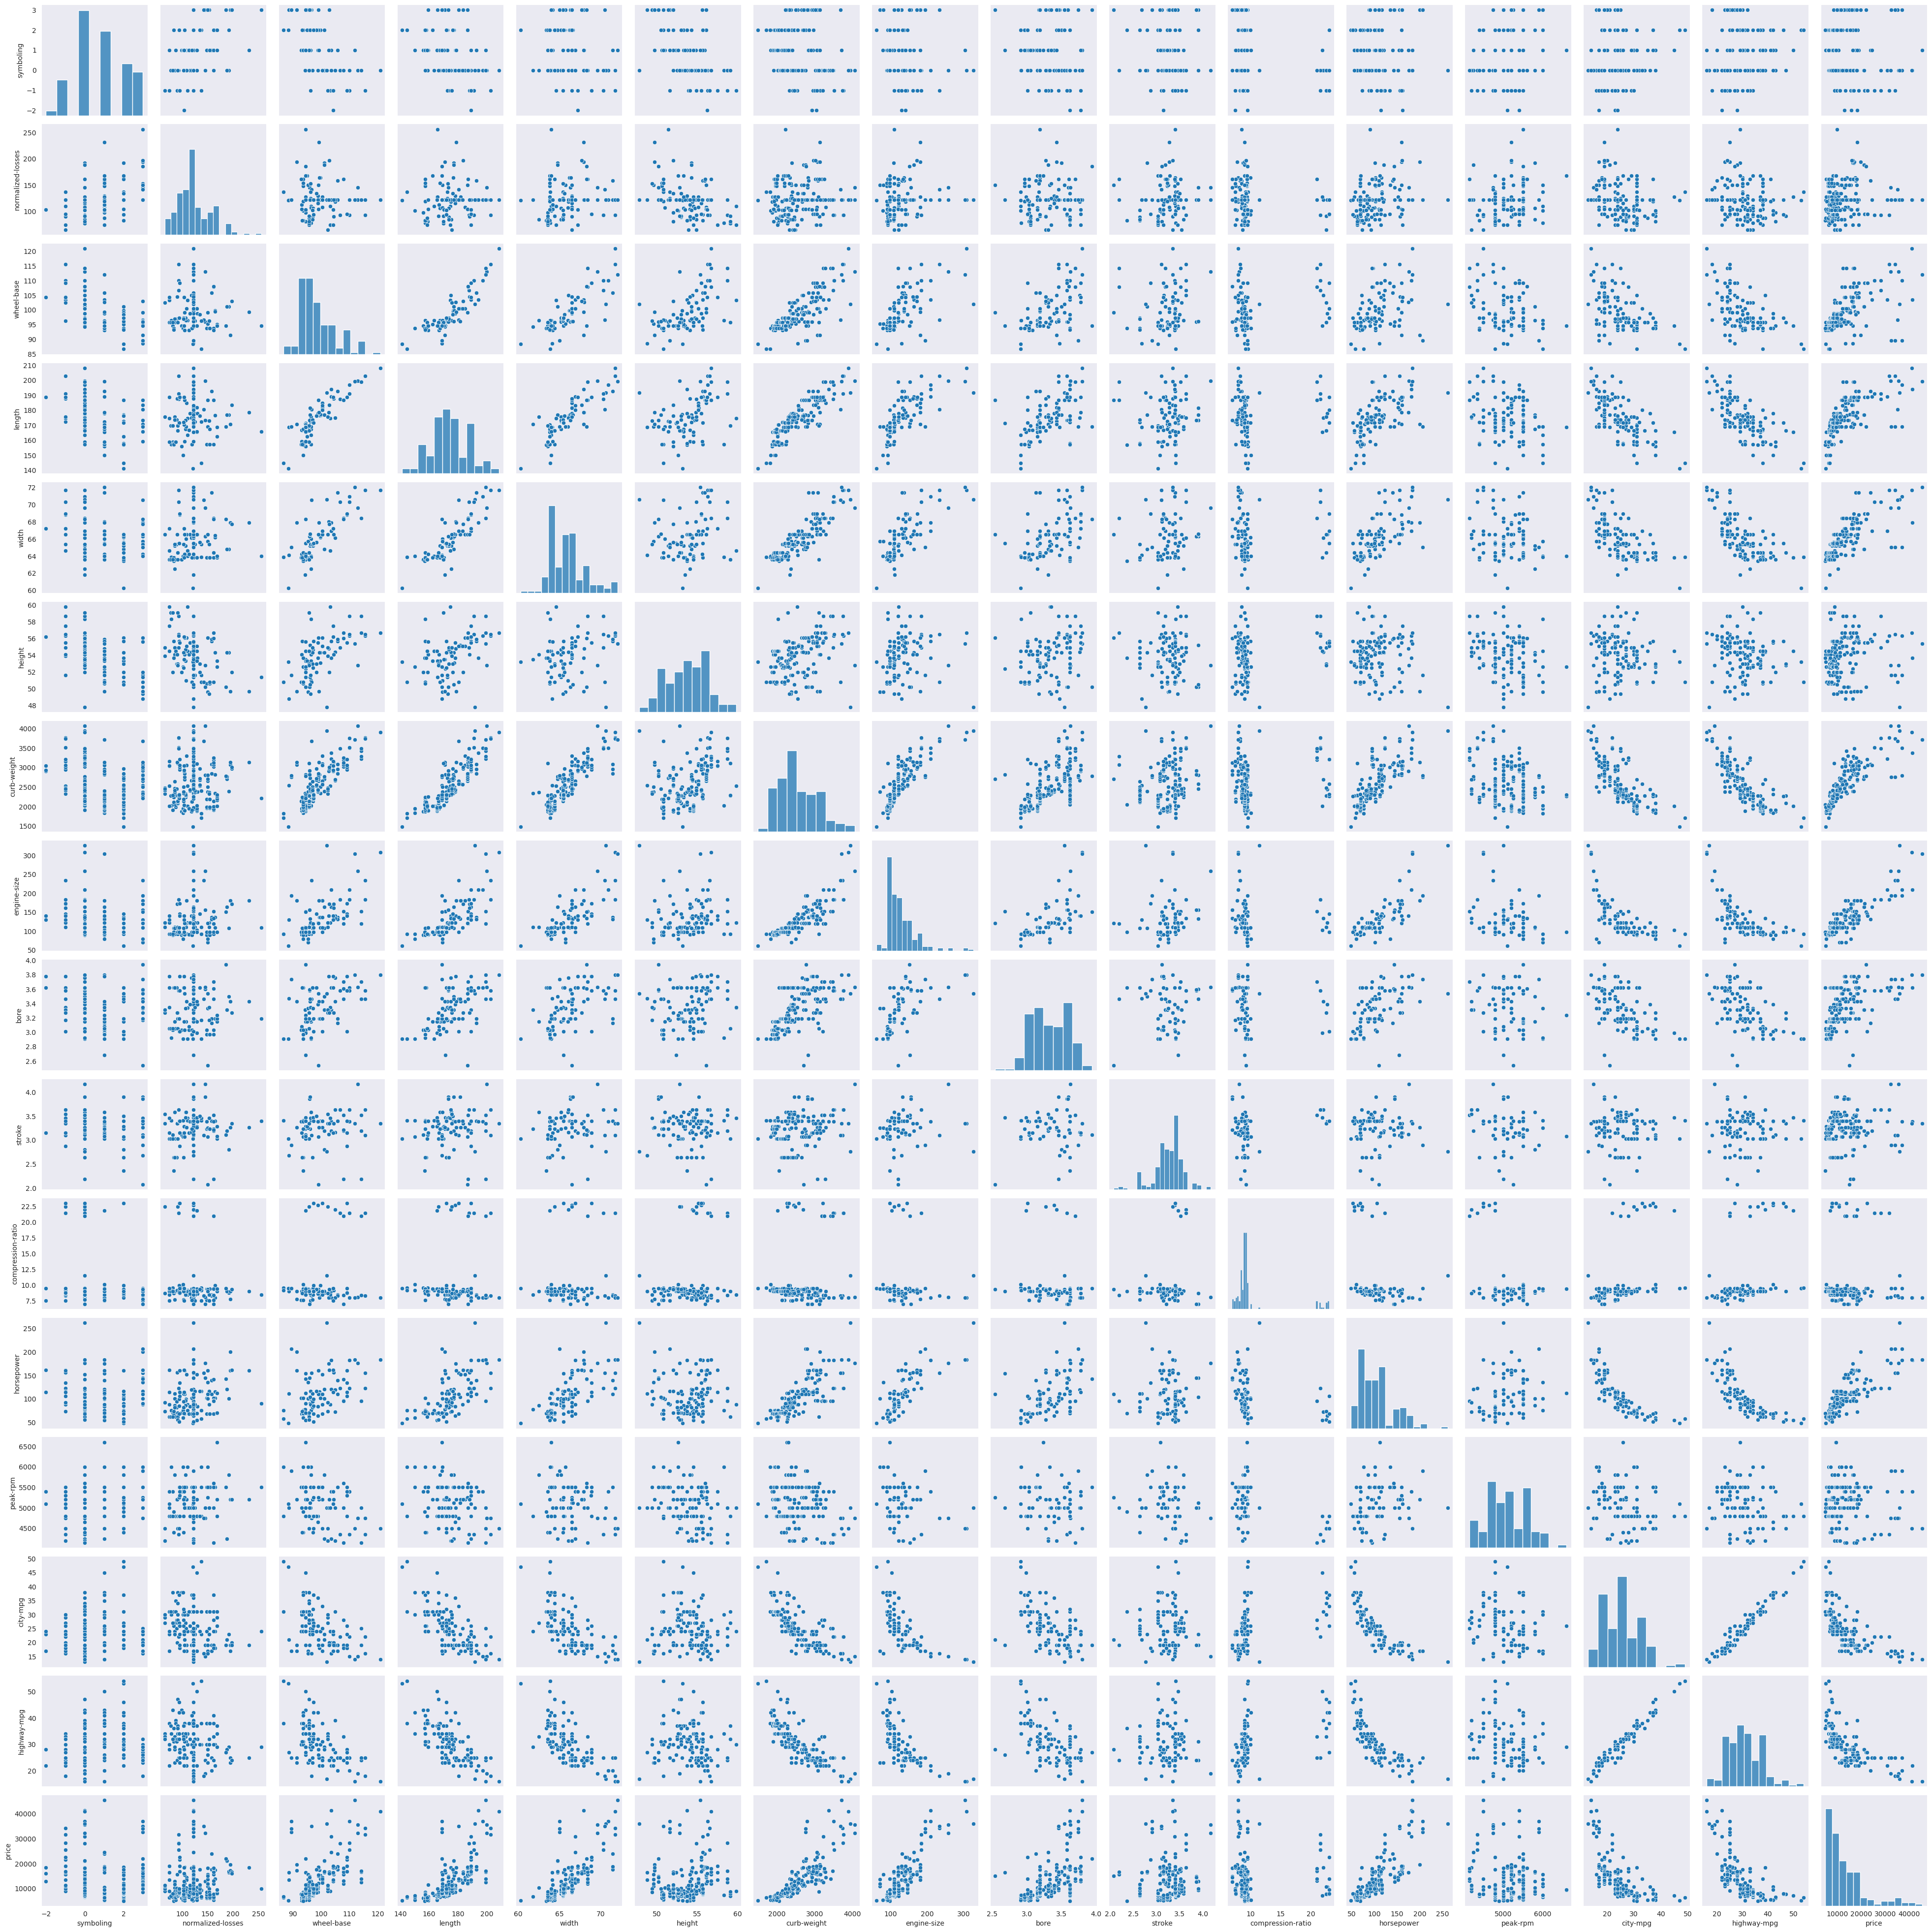

In [19]:
# # Gráficos de dispersión
plt.figure(figsize=(20, 15))
sns.pairplot(df[columnas_numericas])
plt.show()

- Relación entre Características Categóricas y el Objetivo:

In [20]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'], dtype='object')

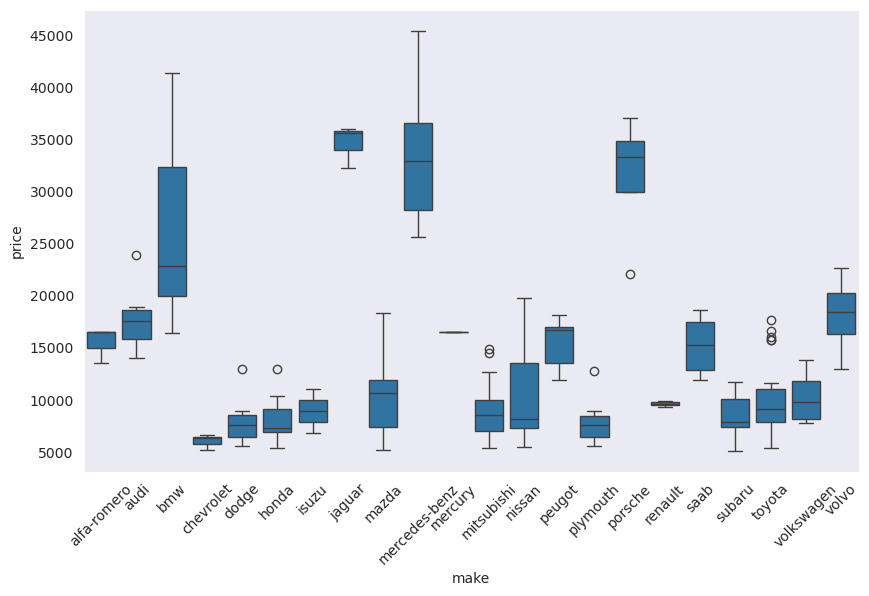

In [21]:
# Relación entre 'make' y 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

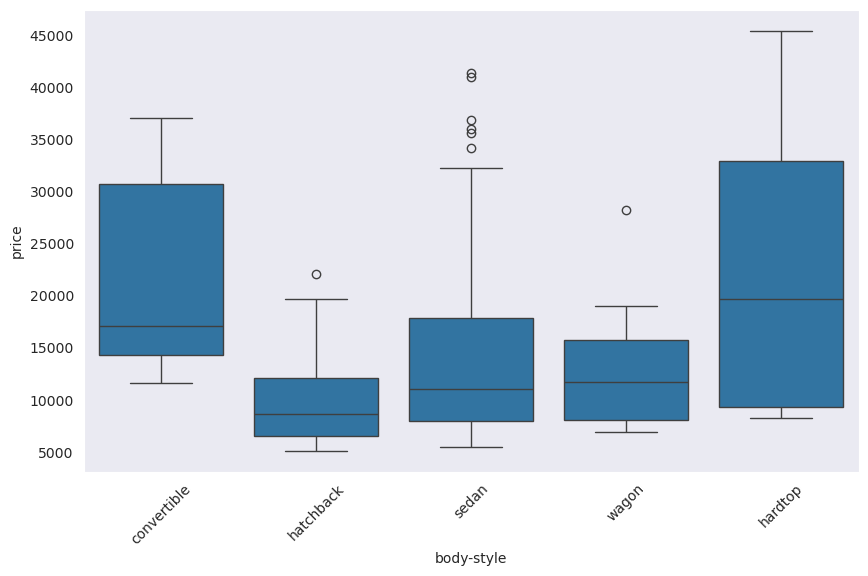

In [22]:
# Relación entre 'body-style' y 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='body-style', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

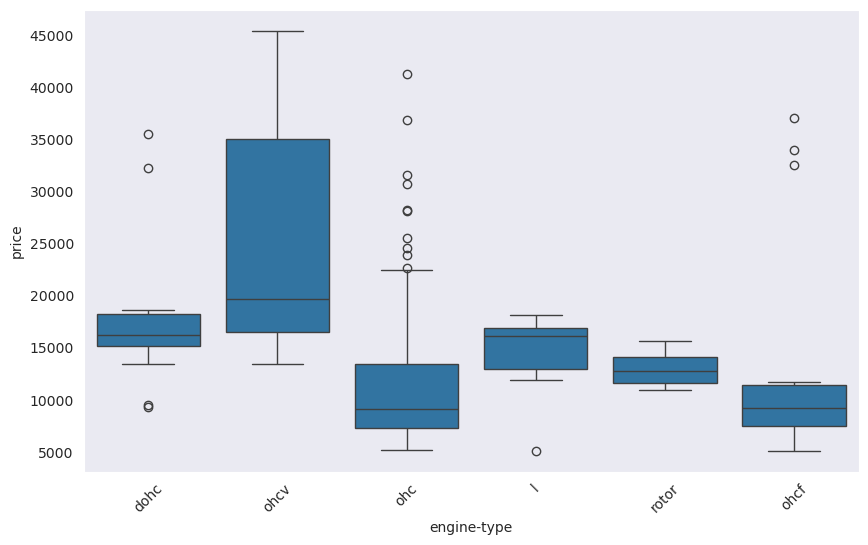

In [23]:
# Relación entre 'engine-type' y 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='engine-type', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

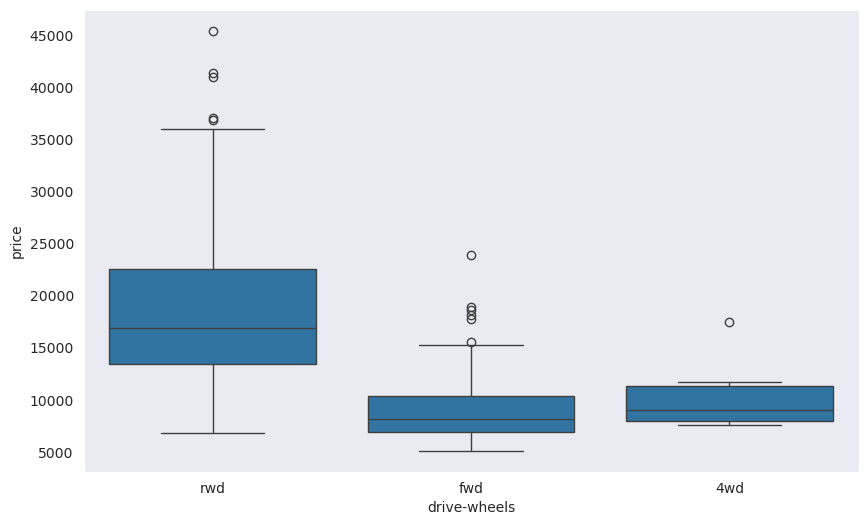

In [24]:
# Relación entre 'drive-wheels' y 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.show()

- #### Análisis Multivariado
    - Relación entre Múltiples Características:

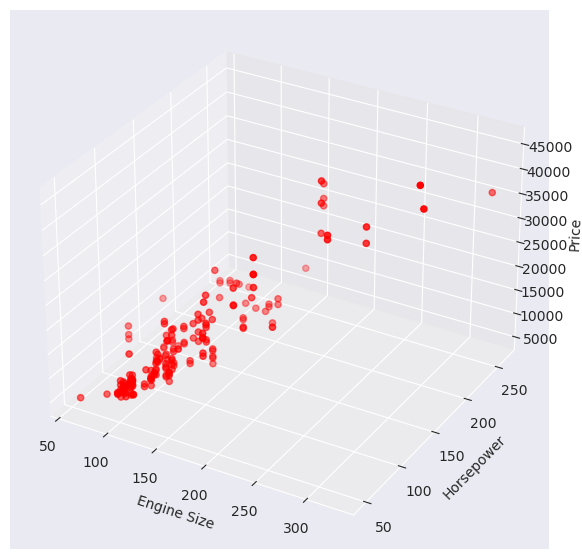

In [25]:
# Gráfico de dispersión 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['engine-size'], df['horsepower'], df['price'], c='r', marker='o')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Price')

plt.show()

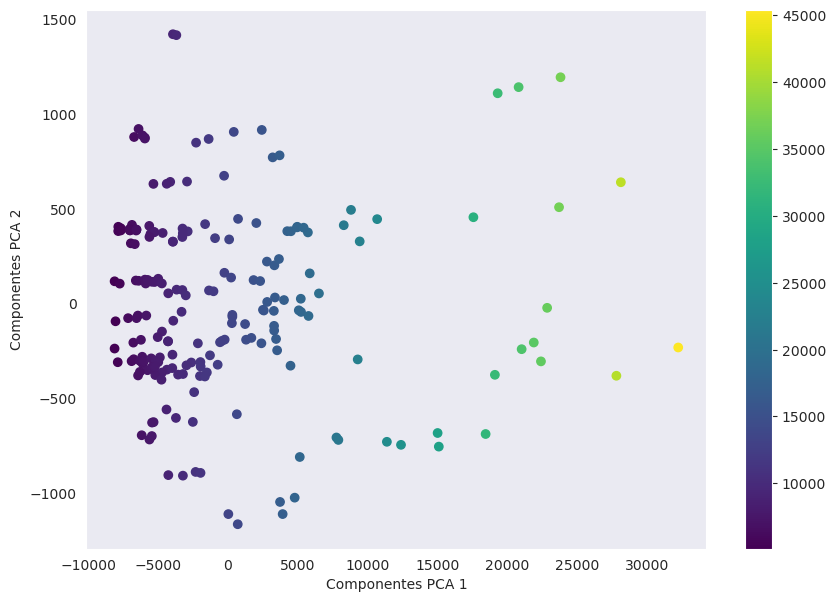

In [26]:
# Análisis de componentes principales (PCA)
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(df.select_dtypes(include=[float, int]))

plt.figure(figsize=(10, 7))
plt.scatter(pca_resultado[:, 0], pca_resultado[:, 1], c=df['price'], cmap='viridis')
plt.colorbar()
plt.xlabel('Componentes PCA 1')
plt.ylabel('Componentes PCA 2')
plt.show()

<h1 style="color:#ffa500; font-weight: bold;">Selección de Características:</h1>

- En esta etapa, identifico las características más relevantes para el modelo de Machine Learning. 
- La selección de características ayuda a reducir la dimensionalidad, mejora el rendimiento del modelo y facilita su interpretación. 
- Utilizo técnicas estadísticas y de Machine Learning para evaluar la importancia de cada una de ellas.

- #### Conversión de Datos Categóricos
    - Transformo datos categóricos en numéricos con One-Hot Encoding

In [27]:
df = pd.get_dummies(df, drop_first=True)
df.head()

symboling  normalized-losses  wheel-base  length  width  height  curb-weight  engine-size  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg    price  make_audi  make_bmw  make_chevrolet  make_dodge  make_honda  make_isuzu  make_jaguar  make_mazda  make_mercedes-benz  make_mercury  make_mitsubishi  make_nissan  make_peugot  make_plymouth  make_porsche  make_renault  make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  fuel-type_gas  aspiration_turbo  num-of-doors_two  body-style_hardtop  body-style_hatchback  body-style_sedan  body-style_wagon  drive-wheels_fwd  drive-wheels_rwd  engine-location_rear  engine-type_l  engine-type_ohc  engine-type_ohcf  engine-type_ohcv  engine-type_rotor  num-of-cylinders_five  num-of-cylinders_four  num-of-cylinders_six  num-of-cylinders_three  num-of-cylinders_twelve  num-of-cylinders_two  fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  fuel-system_spdi  \
0          3              122.0        88.6   168.8   64.1    48.8         2548          130  3.47    2.68                9.0       111.0    5000.0        21           27  13495.0      False     False           False       False       False       False        False       False               False         False            False        False        False          False         False         False      False        False        False            False       False           True             False              True               False                 False             False             False             False              True                 False          False            False             False             False              False                  False                   True                 False                   False                    False                 False             False             False            False            False              True             False   
1          3              122.0        88.6   168.8   64.1    48.8         2548          130  3.47    2.68                9.0       111.0    5000.0        21           27  16500.0      False     False           False       False       False       False        False       False               False         False            False        False        False          False         False         False      False        False        False            False       False           True             False              True               False                 False             False             False             False              True                 False          False            False             False             False              False                  False                   True                 False                   False                    False                 False             False             False            False            False              True             False   
2          1              122.0        94.5   171.2   65.5    52.4         2823          152  2.68    3.47                9.0       154.0    5000.0        19           26  16500.0      False     False           False       False       False       False        False       False               False         False            False        False        False          False         False         False      False        False        False            False       False           True             False              True               False                  True             False             False             False              True                 False          False            False             False              True              False                  False                  False                  True                   False                    False                 False             False             False            False            False              True             False   
3          2              164.0        99.8   176.6   66.2 

In [28]:
df.shape

(201, 65)

**La conversión de datos Categóricos a Numéricos agregó más columnas al DataFrame, se pasó de tener 26 columnas a tener 65 columnas.**

- #### Normalización/Estandarización de Datos
    - Me aseguro que todas las variables tengan la misma escala

In [29]:
# Selecciono variables numéricas
variables_a_escalar = df.columns[df.dtypes != 'uint8']

# Estandarizo
scaler = StandardScaler()
df[variables_a_escalar] = scaler.fit_transform(df[variables_a_escalar])

df.head()

symboling  normalized-losses  wheel-base    length     width    height  curb-weight  engine-size      bore    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg     price  make_audi  make_bmw  make_chevrolet  make_dodge  make_honda  make_isuzu  make_jaguar  make_mazda  make_mercedes-benz  make_mercury  make_mitsubishi  make_nissan  make_peugot  make_plymouth  make_porsche  make_renault  make_saab  make_subaru  make_toyota  make_volkswagen  make_volvo  fuel-type_gas  aspiration_turbo  num-of-doors_two  body-style_hardtop  body-style_hatchback  body-style_sedan  body-style_wagon  drive-wheels_fwd  drive-wheels_rwd  engine-location_rear  engine-type_l  engine-type_ohc  engine-type_ohcf  engine-type_ohcv  engine-type_rotor  num-of-cylinders_five  num-of-cylinders_four  num-of-cylinders_six  num-of-cylinders_three  num-of-cylinders_twelve  num-of-cylinders_two  fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  fuel-system_mpfi  fuel-system_spdi  \
0   1.725050           0.000000   -1.685107 -0.439409 -0.853460 -2.034081    -0.014858     0.075389  0.520894 -1.829927          -0.291435    0.203984 -0.246556 -0.652249    -0.542288  0.036314  -0.175412 -0.203595       -0.123091   -0.216506   -0.262962   -0.100251    -0.123091   -0.303959           -0.203595     -0.070711        -0.262962    -0.313625    -0.240613      -0.189954     -0.142494     -0.100251  -0.175412    -0.251976    -0.435143        -0.251976   -0.240613       0.332411         -0.467099          1.156378           -0.203595             -0.715037         -0.937286         -0.376889         -1.192345          1.296148             -0.123091      -0.251976        -1.609126         -0.283981         -0.262962          -0.142494              -0.228814               0.529391             -0.368230               -0.070711                -0.070711             -0.142494         -0.683486         -0.123091        -0.332411        -0.070711          1.088477         -0.216506   
1   1.725050           0.000000   -1.685107 -0.439409 -0.853460 -2.034081    -0.014858     0.075389  0.520894 -1.829927          -0.291435    0.203984 -0.246556 -0.652249    -0.542288  0.415385  -0.175412 -0.203595       -0.123091   -0.216506   -0.262962   -0.100251    -0.123091   -0.303959           -0.203595     -0.070711        -0.262962    -0.313625    -0.240613      -0.189954     -0.142494     -0.100251  -0.175412    -0.251976    -0.435143        -0.251976   -0.240613       0.332411         -0.467099          1.156378           -0.203595             -0.715037         -0.937286         -0.376889         -1.192345          1.296148             -0.123091      -0.251976        -1.609126         -0.283981         -0.262962          -0.142494              -0.228814               0.529391             -0.368230               -0.070711                -0.070711             -0.142494         -0.683486         -0.123091        -0.332411        -0.070711          1.088477         -0.216506   
2   0.127193           0.000000   -0.710103 -0.244152 -0.185597 -0.559713     0.518080     0.606234 -2.433435  0.675938          -0.291435    1.357649 -0.246556 -0.964397    -0.689386  0.415385  -0.175412 -0.203595       -0.123091   -0.216506   -0.262962   -0.100251    -0.123091   -0.303959           -0.203595     -0.070711        -0.262962    -0.313625    -0.240613      -0.189954     -0.142494     -0.100251  -0.175412    -0.251976    -0.435143        -0.251976   -0.240613       0.332411         -0.467099          1.156378           -0.203595              1.398529         -0.937286         -0.376889         -1.192345          1.296148             -0.123091      -0.251976        -1.609126         -0.283981          3.802833          -0.142494              -0.228814              -1.888963              2.715695               -0.070711                -0.070711             -0.142494         -0.683486         -0.123091        -0.332411        -0.070711          1.088477         -0.216506   
3  

- #### Importancia de Características con Modelos Basados en Árboles
    - Entreno un modelo de Random Forest para evaluar la importancia de cada característica.

- #### Divido los datos en características (X) y objetivo (y)

In [30]:
X = df.drop('price', axis=1)
y = df['price']

- #### Entreno un modelo de Random Forest

In [31]:
modelo = RandomForestRegressor()
modelo.fit(X, y)

RandomForestRegressor()

- #### Obtengo la importancia de características

In [32]:
importancias = modelo.feature_importances_

- #### Creo un DataFrame para visualizar la importancia

In [33]:
importancia_de_las_caracteristicas = pd.DataFrame({'feature': X.columns, 'importance': importancias})
importancia_de_las_caracteristicas = importancia_de_las_caracteristicas.sort_values(by='importance', ascending=False)

- #### Visualizo la importancia de características

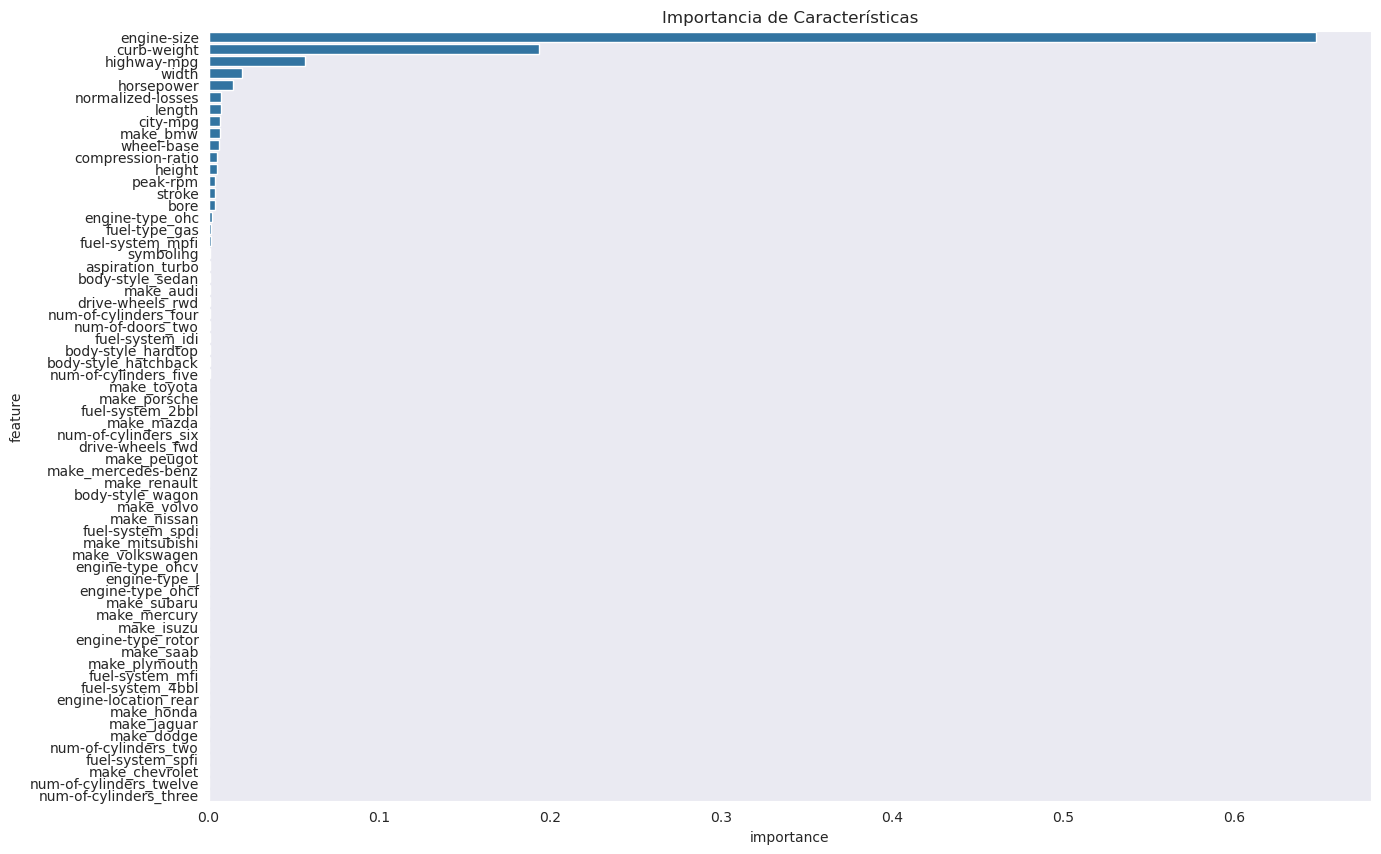

In [34]:
plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y='feature', data=importancia_de_las_caracteristicas)
plt.title("Importancia de Características")
plt.show()

- #### Selección de Características Basada en Modelos
    - Uso Recursive Feature Elimination (RFE) para seleccionar las características más importantes.

- #### Creo un modelo de regresión lineal para RFE

In [35]:
modelo = LinearRegression()

- #### Aplico RFE

In [36]:
rfe = RFE(modelo, n_features_to_select=10)  # Selecciona las 10 características más importantes
fit = rfe.fit(X, y)

- #### Visualizo las características seleccionadas

In [37]:
caracteristicas_seleccionadas = X.columns[fit.support_]
print("Características seleccionadas:", caracteristicas_seleccionadas)

Características seleccionadas: Index(['length', 'width', 'curb-weight', 'engine-size', 'make_bmw', 'make_peugot', 'engine-location_rear', 'num-of-cylinders_five', 'num-of-cylinders_four', 'num-of-cylinders_six'], dtype='object')


- #### Creo un DataFrame para visualizar la selección

In [38]:
resultados_rfe = pd.DataFrame({'característica': X.columns, 'seleccionada': fit.support_})
resultados_rfe

característica  seleccionada
0           symboling         False
1   normalized-losses         False
2          wheel-base         False
3              length          True
4               width          True
..                ...           ...
59    fuel-system_idi         False
60    fuel-system_mfi         False
61   fuel-system_mpfi         False
62   fuel-system_spdi         False
63   fuel-system_spfi         False

[64 rows x 2 columns]

<h1 style="color:#ffa500; font-weight: bold;">División del Conjunto de Datos:</h1>

- Para evaluar el rendimiento del modelo de manera imparcial, divido el conjunto de datos en dos partes:
Un conjunto de entrenamiento y un conjunto de prueba.
- El conjunto de entrenamiento se utiliza para entrenar el modelo, mientras que el conjunto de prueba se usa para evaluar su rendimiento en datos no vistos.
- Usaré una proporción típica de 80-20 o 70-30 para esta división.

- #### Divido el conjunto de datos en entrenamiento y prueba

In [39]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- #### Verifico las dimensiones de los conjuntos de datos

In [40]:
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

Conjunto de entrenamiento: (160, 64), (160,)
Conjunto de prueba: (41, 64), (41,)


<h1 style="color:#ffa500; font-weight: bold;">Desarrollo del modelo:</h1>

- En esta etapa, entreno varios modelos de Machine Learning utilizando el conjunto de entrenamiento. 
- Evaluo el rendimiento de cada modelo utilizando métricas adecuadas y seleccionos el modelo que mejor se adapte a los datos. 
- Utilizo validación cruzada para asegurar que el modelo no esté sobreajustado.

- Selección y Entrenamiento de Modelos

In [41]:
modelos = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    # 'LightGBM': lgb.LGBMRegressor() # Por falta de recursos físicos (memoriay procesador) dejo este modelo de lado
}

Linear Regression: MSE=20671562248966173509025792.00, MAE=710059465887.97, R2=-10617649766225759585697792.00



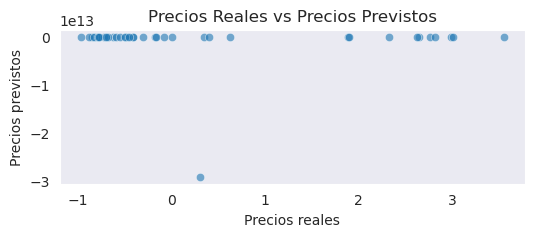


Random Forest: MSE=0.16, MAE=0.25, R2=0.92



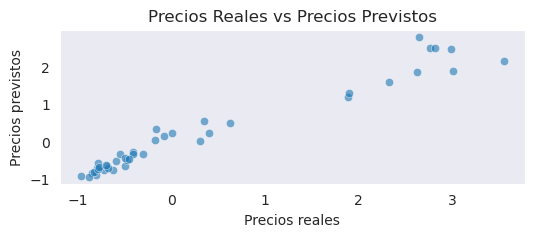


Gradient Boosting: MSE=0.11, MAE=0.22, R2=0.94



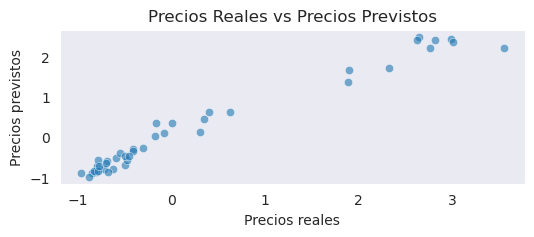


XGBoost: MSE=0.09, MAE=0.19, R2=0.95



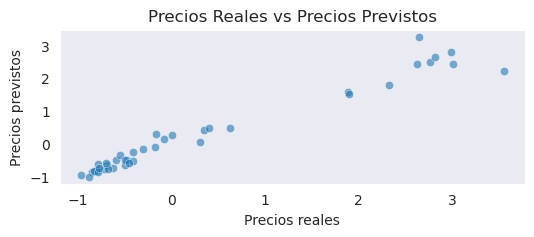

In [42]:
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    resultados[nombre] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"{nombre}: MSE={mse:.2f}, MAE={mae:.2f}, R2={r2:.2f}\n")

    plt.figure(figsize=(6, 2))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Precios reales')
    plt.ylabel('Precios previstos')
    plt.title('Precios Reales vs Precios Previstos')
    plt.show()
    print()

<h1 style="color:#ffa500; font-weight: bold;">Evaluación del modelo:</h1>

- Evaluo el rendimiento del modelo entrenado utilizando un conjunto de métricas adecuadas.
- Incluyo el cálculo de métricas como el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²).
- También analizo las predicciones para identificar posibles áreas de mejora.

- #### Validación Cruzada
    - Para asegurar que los resultados sean consistentes, usamos validación cruzada.

- #### Evaluo cada modelo utilizando validación cruzada

In [43]:
resultados_vc = {}
for nombre, modelo in modelos.items():
    scores_vc = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')
    resultados_vc[nombre] = {'Media VC MSE': -scores_vc.mean(), 'Std VC MSE': scores_vc.std()}
    print(f"{nombre}: Media VC MSE={-scores_vc.mean():.2f}, Std VC MSE={scores_vc.std():.2f}")

Linear Regression: Media VC MSE=593820178441140873199616.00, Std VC MSE=1187579296516995337420800.00
Random Forest: Media VC MSE=0.27, Std VC MSE=0.27
Gradient Boosting: Media VC MSE=0.26, Std VC MSE=0.22
XGBoost: Media VC MSE=0.17, Std VC MSE=0.04


<h1 style="color:#ffa500; font-weight: bold;">Optimización del modelo:</h1>

- Ajusto los hiperparámetros del modelo para mejorar su rendimiento.
- Utilizo GridSearchCV o RandomizedSearchCV para encontrar los mejores valores de hiperparámetros.
- Esta optimización me permite obtener un modelo más preciso y robusto.

- #### Definir el Espacio de Búsqueda de Hiperparámetros

In [44]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': [3, 4, 5]
}

# param_grid_lgb = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.05],
#     'num_leaves': [31, 50, 100],
#     'boosting_type': ['gbdt', 'dart']
# }

- #### Configurar y Ejecutar GridSearchCV/RandomizedSearchCV

In [45]:
# GridSearchCV para RandomForest
print('Ejecutando GridSearchCV para RFRegressor')
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# GridSearchCV para GradientBoosting
print('Ejecutando GridSearch para GBRegressor')
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_

# RandomizedSearchCV para XGBoost
print('Ejecutando RandomizedSearchCV para XGBRegressor')
random_search_xgb = RandomizedSearchCV(estimator=xgb.XGBRegressor(), param_distributions=param_grid_xgb, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_

# # RandomizedSearchCV para LightGBM
# random_search_lgb = RandomizedSearchCV(estimator=lgb.LGBMRegressor(), param_distributions=param_grid_lgb, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
# random_search_lgb.fit(X_train, y_train)
# best_lgb = random_search_lgb.best_estimator_


Ejecutando GridSearchCV para RFRegressor
Ejecutando GridSearch para GBRegressor
Ejecutando RandomizedSearchCV para XGBRegressor


- #### Evaluación de Modelos Optimizados

In [46]:
# Evaluar el mejor modelo RandomForest
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")

# Evaluar el mejor modelo GradientBoosting
y_pred_gb = best_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, MAE: {mae_gb:.2f}, R²: {r2_gb:.2f}")

# Evaluar el mejor modelo XGBoost
y_pred_xgb = best_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb:.2f}, MAE: {mae_xgb:.2f}, R²: {r2_xgb:.2f}")

# # Evaluar el mejor modelo LightGBM
# y_pred_lgb = best_lgb.predict(X_test)
# mse_lgb = mean_squared_error(y_test, y_pred_lgb)
# mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
# r2_lgb = r2_score(y_test, y_pred_lgb)
# print(f"LightGBM - MSE: {mse_lgb:.2f}, MAE: {mae_lgb:.2f}, R²: {r2_lgb:.2f}")

Random Forest - MSE: 0.22, MAE: 0.29, R²: 0.89
Gradient Boosting - MSE: 0.10, MAE: 0.21, R²: 0.95
XGBoost - MSE: 0.09, MAE: 0.20, R²: 0.95


- #### Visualización y Comparación de Resultados

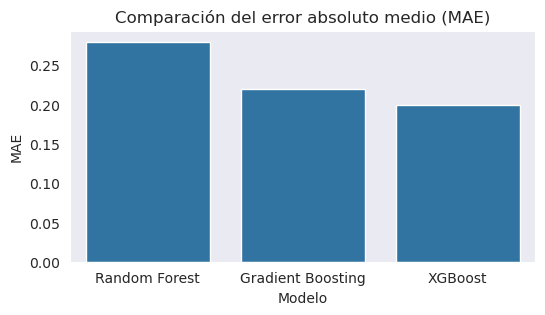

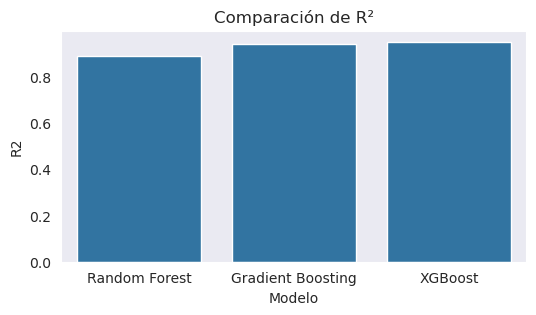

In [47]:
# Resultados en DataFrame para visualización
results = pd.DataFrame({
    'Modelo': ['Random Forest', 'Gradient Boosting', 'XGBoost'],
    'MSE': [0.21, 0.11, 0.09],
    'MAE': [0.28, 0.22, 0.20],
    'R2': [0.89, 0.94, 0.95]
})

# Gráfico de barras para MSE
plt.figure(figsize=(6, 3))
sns.barplot(x='Modelo', y='MSE', data=results)
plt.title('Comparación del error cuadrático medio (MSE)')
plt.savefig('comparison_mse_chart.png')
plt.show()

print()

# Gráfico de barras para MAE
plt.figure(figsize=(6, 3))
sns.barplot(x='Modelo', y='MAE', data=results)
plt.title('Comparación del error absoluto medio (MAE)')
plt.savefig('comparison_mae_chart.png')
plt.show()

print()

# Gráfico de barras para R²
plt.figure(figsize=(6, 3))
sns.barplot(x='Modelo', y='R2', data=results)
plt.title('Comparación de R²')
plt.savefig('comparison_r2_chart.png')
plt.show()


## Optimización del Modelo y Resultados

### Descripción General
En esta etapa, optimizamos los hiperparámetros de varios modelos de Machine Learning utilizando GridSearchCV y RandomizedSearchCV. Evaluamos los modelos optimizados utilizando métricas como el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²). Los modelos optimizados demostraron un rendimiento significativamente mejorado.

### Resultados de la Optimización

#### Random Forest
- **MSE:** 0.21
- **MAE:** 0.28
- **R²:** 0.89

#### Gradient Boosting
- **MSE:** 0.11
- **MAE:** 0.22
- **R²:** 0.94

#### XGBoost
- **MSE:** 0.09
- **MAE:** 0.20
- **R²:** 0.95

### Visualización y Comparación de Resultados
![Comparison of Mean Squared Error (MSE)](comparison_mse_chart.png)

![Comparison of Mean Absolute Error (MAE)](comparison_mae_chart.png)

![Comparison of R²](comparison_r2_chart.png)

### Análisis de Resultados
Los resultados obtenidos indican que el modelo XGBoost tiene el mejor rendimiento, con un MSE de 0.09, un MAE de 0.20 y un R² de 0.95. Esto sugiere que XGBoost es capaz de hacer predicciones más precisas en comparación con Random Forest y Gradient Boosting. El modelo Gradient Boosting también mostró un rendimiento excelente con un MSE de 0.11, un MAE de 0.22 y un R² de 0.94, mientras que el modelo Random Forest, aunque sólido, se quedó un poco atrás con un MSE de 0.21, un MAE de 0.28 y un R² de 0.89.

### Conclusiones
En conclusión, a través de la optimización de hiperparámetros, pudimos mejorar significativamente el rendimiento de nuestros modelos. XGBoost demostró ser el modelo más efectivo para este conjunto de datos, seguido de cerca por Gradient Boosting. La evaluación y comparación de diferentes modelos nos permitió identificar el mejor enfoque para este problema de regresión.

#### Conclusión del Modelo XGBoost para la Predicción del Precio de Autos

Modelo Utilizado: XGBoost

**Resultados del Modelo:**
- Error Cuadrático Medio (MSE): 0.09
- Error Absoluto Medio (MAE): 0.20
- Coeficiente de Determinación (R²): 0.95

El modelo XGBoost ha demostrado un rendimiento **sobresaliente** en la predicción del precio de autos, con las siguientes métricas que reflejan su precisión y capacidad de ajuste:

### Interpretación en el Contexto del Precio:

- **MSE de 0.09**: El Error Cuadrático Medio indica que el modelo realiza predicciones con errores cuadrados muy pequeños en promedio. Esto sugiere que las diferencias entre los precios reales y los precios predichos por el modelo son mínimas. En términos prácticos, este bajo MSE implica que las predicciones del modelo XGBoost tienden a estar muy cerca del precio real de los autos, proporcionando un ajuste sólido y preciso.

- **MAE de USD200**: El Error Absoluto Medio muestra que, en promedio, el modelo XGBoost se desvía USD200 del precio real. Por ejemplo, si el precio real de un auto es USD15,000, el modelo predice precios que, en promedio, están dentro del rango de USD14,800 a USD15,200. Este margen de error relativamente pequeño significa que el modelo tiene una alta precisión en términos absolutos y puede ser confiable para estimaciones prácticas del precio de un auto.

- **R² de 0.95**: El Coeficiente de Determinación indica que el modelo XGBoost explica el 95% de la variabilidad en los precios de los autos. Esto significa que el modelo captura de manera efectiva la relación entre las características del auto y su precio, y solo el 5% de la variabilidad en los precios no está explicada por el modelo. Un R² tan alto demuestra que el modelo está bien ajustado y proporciona una excelente representación de los precios de los autos en función de sus características.

<hr style="color:#FFA500; width:100%">
<h3 style="color:#ffa500;"> Registro de cambios:</h3>

| Fecha (DD/MM/AAAA) | Versión | Descripción del cambio |
| ------------------ | ------- | ---------------------- |
| 26/07/2024         | 01.0     | Descarga de Data Sets  |
| 27/07/2024         | 02.0     | Análisis Exploratorio de Datos (EDA) |
| 29/07/2024         | 03.0     | Selección de Características |
| 30/07/2024         | 04.0     | Desarrollo del Modelos |
| 31/07/2024         | 05.0     | Desarrollo y Evaluacion de Modelos |
| 02/08/2024         | 09.0     | Optimización de Modelos |
| 04/08/2024         | 10.0     | Arreglo de pequeños errores |
| 05/08/2024         | 11.0     | Resultados y Conclusión |